# D5 - 02 -Tensorflow

## Content
- Installation and introduction
- Session
- Computational graphs
- Operations and tensors
- Placeholders and Variables



## Remember jupyter notebooks
- To run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>.
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>.

## Installation instructions

On Linux/OSX:

- Open your command prompt
- "pip install tensorflow"

On Windows:

- Open your anaconda prompt
- "pip install --upgrade tensorflow"

Then run the cell below to make sure that tensorflow was correctly installed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# You should have version 1.7.0
print(tf.__version__)

/home/mi/ikramgaini/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.7.0


# The Core Concept: Sessions

In TensorFlow, the execution of operations and evaluation of tensors may only be performed in a special environment referred to as **session**. Sessions are responsible for allocating and managing resources, variables, and more aspects of the execution of our code.

A tensorflow session has to be created as an instance of the tf.Session() class (it can be configured, but this is too advanced for now).

In [13]:
my_session = tf.Session()

After initializing our session, it will be available as an environment in which to execute our operations using the session.run() method. This methods accepts as parameters a list of **fetches** and a dictionary of **feeds**, being respectively the outputs that we want calculated and the inputs that are required for it. session.run() will then return the result obtained on the **fetches** nodes.

In [14]:
# This code will clearly fail, as we didnt define our inputs and outputs
result = my_session.run(outputs_we_want, inputs_we_have)

NameError: name 'outputs_we_want' is not defined

Now we just need to learn how to define algorithms in tf!

## Computational graphs

In TensorFlow, algorithms are represented as **computational graphs**. 

In such graphs **nodes** represent operations, while arrows represent data flowing between these operation; these data are also called **tensors**.

This representation is extremely intuitive to visualize; moreover, an operation in tensorflow can be pretty much anything, thus the great flexibility of the library.

<img src="graphs.png">

## Tensors

Tensors are multidimentional collections of values that share a common type. In simpler words, they are 'containers' for a certain number of values, arranged in a determined shape. Examples:

- scalars -->  tensors of 1 value with shape [0]
- vetors -->  tensors of $N$ values with shape [N]
- matrices --> tensors of $NxM$ values with shape [N, M]

and so on.

Until we execute our graph, tensors are not holding any values, but they are just containers; when we run the structure made of tensors and operations, aka our graph, inside the session, tensors are used to process values in a machine-efficient way.

#### Example

We can now try and implement our very first simple graph. We'll start easy and just get the result of 2 + 3.

What we need to do here is to create a tensor that will hold the value '2', another for the value '3', and a third tensor for their '+' operation. We will now run and fetch from the session the output of the 'sum' node.

In [15]:
# We use tf.constant to create our tensors starting from a given value. Note that this value can also be
# an iterable such a list or numpy array
a = tf.constant(2)
b = tf.constant(3)

c = tf.add(a, b)

# Note: this also works
d = a + b

# Note that if we print c we don't get 5, we just get the information that it's actually a tensor!
print(c)

# Now we run c and d inside the session and print the output value
print(my_session.run([c,d]))

Tensor("Add:0", shape=(), dtype=int32)
[5, 5]


#### Exercise

Let's try something more complicated: use the tf.multiply() and tf.reduce_sum() operations to implement the scalar product of [1,0,1,0,1,-1] and [0,1,0,1,1,1], and verify that the output is zero.

Note: tf.reduce_sum() has the same behaviour as np.sum()

In [17]:
my_session.run(tf.reduce_sum(tf.multiply([1,0,1,0,1,-1],[0,1,0,1,1,1])))

0

#### Exercise

Rebuild the pi estimator, but this time use tensorflow functions to generate the points and their norm. Use numpy to count the elements inside the circle

In [30]:
throws = int(1000000)

rnd = tf.random_uniform([throws, 2], minval = 0, maxval = 1)
dst = tf.norm(rnd, axis=1)

norm = my_session.run(dst)

hits = np.sum(norm < 1)/throws*4

print(hits)

3.141208


So far, tensorflow is not very useful except for being a very complicated way of calculating 2 + 3. We need to introduce the concept of **placeholder** to make it more relevant.

Placeholders are what we use to pass values to our network. This makes tensorflow much more useful as we can now build complex computational graphs that rely on an undetermined input, then pass the input value only when we actually run the code. The only thing we need to set when we create the placeholder is the data type it will have to contain.

If we want our code to be more optimized we can also set a shape for the placeholder (this way the session will know how much memory to allocate for it); this is not necessary, but it's a good practice for when we want our input data to have a fixed size.

If we want some of the dimensions to be fixed and others to change, we can use a value for the fixed one, and place a 'None' in the position of the variable dimension.

This is done by creating a dictionary that contains tensor names and their corresponding inputs, and passing it as the second argument of session.run()

In [34]:
# For defining the type we can use the tf.float32 type, which behaves in the same way as a numpy float32.
# We want the inputs to be scalars. This is a particular case, and we have to set the shape to ()
a = tf.placeholder(tf.float32, shape = (None))
b = tf.placeholder(tf.float32, shape = (None))

c = a + b

inputs_dict = {
    a : 2,
    b : 3
}

print(my_session.run(c, inputs_dict))

5.0


#### Exercise

Implement the scalar product that we constructed before, but have it accept two arrays instead of using two constant ones. Set the shape of the placeholders so that they only accept 1D arrays of variable size.

Note: scalars will pass through if

shape = (None)

but will raise an error if

shape = (None,)

In [43]:
a = tf.placeholder(tf.float32, shape = (None,))
b = tf.placeholder(tf.float32, shape = (None,))

c = tf.reduce_sum(tf.multiply(a,b))

inputs_dict = {
    a : [0,1,2],
    b : [1,2,3]
}



print(my_session.run(c, inputs_dict))

8.0


#### Exercise

Rebuild the linear regression example using only tensorflow:

$$\begin{eqnarray*}
\textrm{slope} & = & \frac{\sum_{n=0}^{N-1} \left( x_n - \bar{x} \middle) \middle( y_n - \bar{y} \right)}{\sum_{n=0}^{N-1} \left( x_n - \bar{x} \right)^2} \\
\textrm{const} & = & \bar{y} - \textrm{slope } \bar{x}
\end{eqnarray*}$$


In [67]:
x = tf.placeholder(tf.float64, shape = (None))
y = tf.placeholder(tf.float64, shape = (None))


x_mean = tf.reduce_mean(x)
y_mean = tf.reduce_mean(y)



numerator = tf.reduce_sum(tf.multiply(x - x_mean, y - y_mean))

denominator = tf.reduce_sum(tf.multiply(x - x_mean, x - x_mean))


slope = numerator/denominator

const = y_mean - slope * x_mean

inputs_dict = {
    x : [0,1,2],
    y : [1,2,3]
}


print(my_session.run(const, inputs_dict))







1.0


Let's now introduce the third concept that we need to build a machine learning system. When we train a ML algorithm, we have some internal variables (weights) that are updated to reach a certain solution. We cannot use tf.constant() for those as its value can't be changed. We could use placeholders and handle the process of update ourselves, but that would be a huge hassle.

Tensorflow solves this with the **Variable** class. These are persistent but mutable handles, whose value survives along with our session, but can be easily modified. They are characterized by an unmutable data type and shape; we don't need to set them, as they are automatically inferred by the variable's initializer.

Variable() has lots of options to regulate its creation, but the most important one is its **initialization**. This is the value that the variable will be assigned when we decide to give the variable a new value; we have to do this before using it, but it can also be used to reset a variable to its initial value. 

Initialization is done through running inside a session a specific kind of node, which can be used to regulate which variables we want to set/reset. For simple cases, we can run the node tf.global_variables_initializer(), which simply reset every variable in our graph.

In [68]:
initial_w = np.arange(9).reshape(3, 3)

# First we create the variable
w = tf.Variable(initial_w)

# Now we create the initializer tensor
initializer = tf.global_variables_initializer()

# Note: running the following line will give us an error,
# as we are using a variable before having set a value for it!
print(my_session.run(w))

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_INT64, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]

In [69]:
# If we run first the initializer
my_session.run(initializer)

# then the variable, everything works correctly
print(my_session.run(w))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Every variable has a method variable.assign(), which we can use to change its value. In practice though most of the updates to the variables will be automatic

In [70]:
# Create a tensor that updates the variable
update_w = w.assign(np.arange(10,19).reshape(3,3))

# Run our 'updater' tensor
my_session.run(update_w)

print(my_session.run(w))

# after we rerun the initializer, w goes back to its default value
my_session.run(initializer)

print(my_session.run(w))

[[10 11 12]
 [13 14 15]
 [16 17 18]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### Exercise

Build a graph that multiplies a scalar by a 1D array. Use a placeholder for the scalar and a variable for the array. Initialize the array to [1,0,1,0,1].

Feed a value of 5 to the placeholder and print the result. Then update the variable to [0,1,0,1,0], and print the result while feeding a value of 3

In [88]:
initial_w = tf.Variable([1,0,1,0,1])
scalar_w = tf.Variable(5)
# First we create the variable

mult_w = initial_w * scalar_w
w = tf.Variable(initial_w)

# Now we create the initializer tensor
initializer = tf.global_variables_initializer()


# Note: running the following line will give us an error,
# as we are using a variable before having set a value for it!
print(my_session.run(initializer))
print(my_session.run(w))
print(my_session.run(mult_w))

update_vector = initial_w.assign([0,1,0,1,0])

print(my_session.run(update_vector))
print(my_session.run(mult_w))

None
[1 0 1 0 1]
[5 0 5 0 5]
[0 1 0 1 0]
[0 5 0 5 0]


Note: sometimes it's good to reset our session, in order to free it from variables that are not needed anymore. You can close a session by calling its .close() method, but all its internal variables, tensors, and placeholders will be deleted.

In [90]:
my_session.close()

In practice, however, how do we update automatically the weights of our network in tensorflow?

First, let's define the problem we want it to solve. We generate points belonging to two different gaussians on the x,y plane, and we want our network to distinguish them

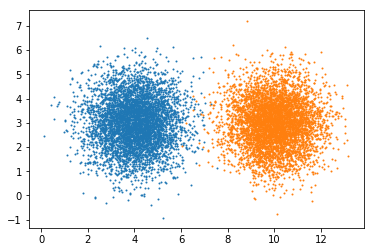

In [2]:
g1 = np.random.multivariate_normal([4,3], cov = np.eye(2,2), size = 5000)
g2 = np.random.multivariate_normal([10,3], cov = np.eye(2,2), size = 5000)

plt.scatter(g1[:,0], g1[:,1], s = 1)
plt.scatter(g2[:,0], g2[:,1], s = 1)
plt.show()

train_datapoints = 4000
valid_datapoints = 1000

train_data = np.concatenate((g1[:train_datapoints],g2[:train_datapoints]), axis = 0)
train_labels = np.concatenate((np.zeros(train_datapoints), np.ones(train_datapoints))).reshape(-1,1)

valid_data = np.concatenate((g1[-valid_datapoints:],g2[-valid_datapoints:]), axis = 0)
valid_labels = np.concatenate((np.zeros(valid_datapoints), np.ones(valid_datapoints))).reshape(-1,1)

We need our network to assign a single value to each (x,y) pair, so we want a (2,1)-sized weights matrix and a (1,)-sized bias array.

We want to initialize them to small, nonzero values, so we can use as initializer tf.random_normal().

In [3]:
sess = tf.Session()

In [4]:
w = tf.Variable(tf.random_normal(shape = [2,1]))
b = tf.Variable(tf.random_normal(shape = [1,]))

Next we need to define a placeholder for our input. We want it to accept a variable number of 2-D points, so we set the shape to (None, 2)

In [5]:
x = tf.placeholder(tf.float32, shape = (None, 2))

We want our network to only output values between 0 and 1, so we use a sigmoid function to constrain the output between these two values. This function, along with many other useful ones, can be found in the tf.nn package

In [6]:
y_network = tf.nn.sigmoid(x @ w + b)

We need another placeholder for the labels, as we will need to feed those to the network too

In [7]:
y_label = tf.placeholder(tf.float32, shape = (None,1))

Now we can define the loss function, which our network is going to optimize the weights for:

In [8]:
loss = tf.losses.mean_squared_error(y_label, y_network)

We can finally introduce the tool that will update the weights of the network, the tensorflow optimizer, which requires a learning rate to be initialized. The optimizer's 'minimize' method, which needs a tensor 

In [9]:
# Note: when setting the learning rate, a rule of thumb is 'the bigger the network, the smaller the learning rate'
learning_rate = 1e-1
training_tensor = tf.train.AdamOptimizer(learning_rate).minimize(loss)

We now initialize our variables (Note: we have to do this after we create all the variables)

In [10]:
tensorboard_writer = tf.summary.FileWriter(logdir = "./tensorboard_data", graph = sess.graph)

In [11]:
sess.run(tf.global_variables_initializer())


#terminal: tensorboard --logdir=tensorboard_data/


And then we can train our network. We can do this by running the training_tensor we created earlier inside a tensorflow session, along with the nodes we want to evaluate

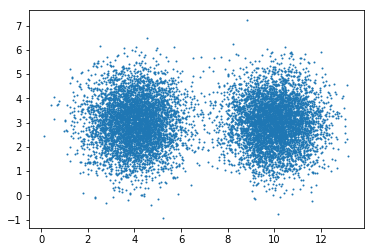

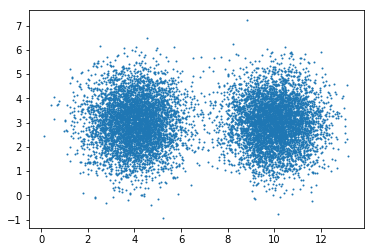

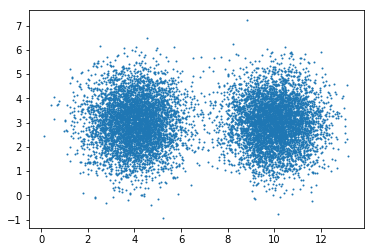

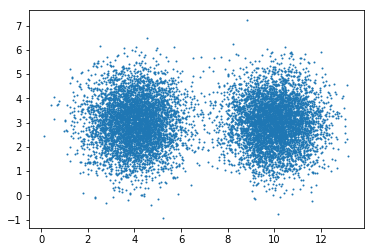

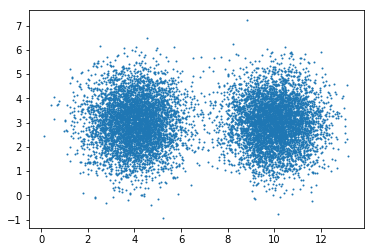

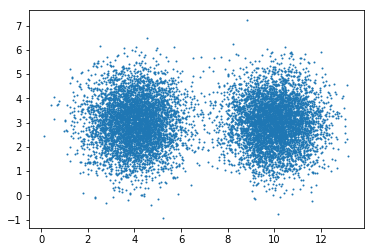

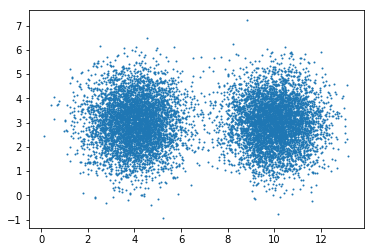

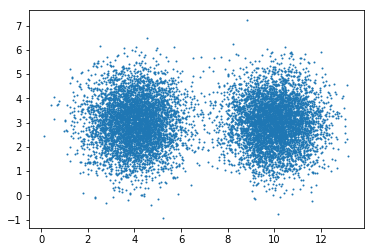

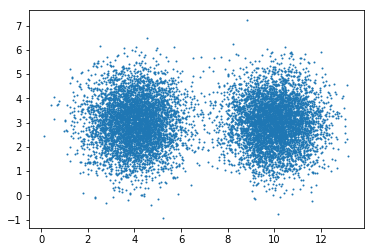

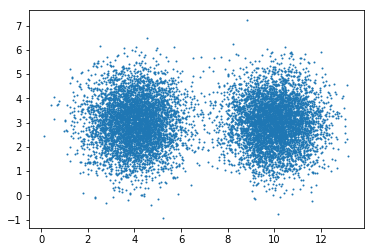

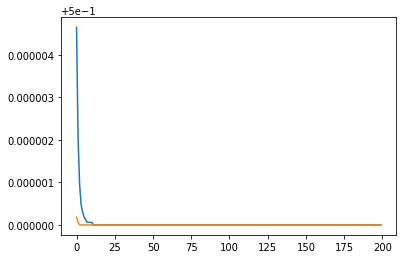

In [12]:
epochs = 200
training_score = np.empty(epochs)
validation_score = np.empty(epochs)

for epoch_index in range(epochs):
    train_dict = {
        x : train_data,
        y_label : train_labels
    }
    
    valid_dict = {
        x : valid_data,
        y_label : valid_labels
    }
    # Train
    _, training_score[epoch_index] = sess.run([training_tensor, loss], train_dict)
    
    # Get the validation score
    validation_score[epoch_index] = sess.run(loss, valid_dict)
    
    # We also want to visualize every 20 epochs how the network is classifying the two gaussians
    if epoch_index % 20 == 1:
        
        all_datapoints = np.concatenate((g1, g2), axis = 0)
        
        y_rec = sess.run(y_network, {x: all_datapoints})

        g1_rec = all_datapoints[np.where(y_rec[:,0] > 0.5)]
        g2_rec = all_datapoints[np.where(y_rec[:,0] < 0.5)]
                
        if g1_rec.size > 0:
            plt.scatter(g1_rec[:,0], g1_rec[:,1], s = 1)
            
        if g2_rec.size > 0:
            plt.scatter(g2_rec[:,0], g2_rec[:,1], s = 1)
            
        plt.show()


plt.plot(training_score)
plt.plot(validation_score)
plt.show()

#### Exercise

Generate points from a 2-dimensional gaussian distribution centered around (0,0) with covariance matrix = [[1,0],[0,1]. Generate labels for each point so that:

- label = 1, x*y > 0
- 0, x*y < 0

Note that this is not a linear problem, so it cannot be solved by a network with a single linear layer. 

Build a 3-layer network in tensorflow, and train it so that it will correctly classify each point. A network with layers with size 8 should be sufficient. Play around with the learning rate and number of epochs until you manage to have the network converge to a result you consider acceptable.

Tip: One of the best functions to be used as activations for intermediate layers is the 'ReLU' function, that you can find in the tf.nn package

In [129]:
x = np.random.multivariate_normal([0,0], cov = np.eye(2,2), size = 5000)
#2 = np.random.multivariate_normal([10,3], cov = np.eye(2,2), size = 5000)


label = np.sign(x[:,0]) * np.sign(x[:,1])
label[label < 0] = 0



new_sess = tf.Session()

w = tf.Variable(tf.random_normal(shape = [2,5000]))
b = tf.Variable(tf.random_normal(shape = [2,]))




y_network = tf.nn.sigmoid(w@x+b)

y_label = tf.placeholder(tf.float32, shape = (None,2))

loss = tf.losses.mean_squared_error(y_label, y_network)

learning_rate = 1e-1
training_tensor = tf.train.AdamOptimizer(learning_rate).minimize(loss)


global_init = tf.global_variables_initializer()
sess.run(global_init)

#### Exercise

Now build a new network that will manage to fit the nonlinear function given below. You can do this by using setting the input size to 1 and output size to 1, and use a linear activation as output so that your network can generate basically any value.



In [ ]:
def gen_data(length, noise=0.1):
    x = 2.0 * (np.random.rand(length) - 0.5) * np.pi * 1.5
    f = lambda x: np.tanh(x * 0.5) * np.exp(-x**2)
    y = f(x) + np.random.randn(len(x)) * noise
    return x, y, f

x, y, f = gen_data(2000)
x2 = np.linspace(x.min(), x.max(), 100)
y2 = f(x2)

plt.scatter(x, y, s=0.5)
plt.plot(x2, y2, linewidth=2, color='C1')
plt.show()